In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\91984\Downloads\dataframe_.csv")
df

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [4]:
df.describe()

input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495

In [5]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

input     0
output    0
dtype: int64

<AxesSubplot:xlabel='input', ylabel='Density'>

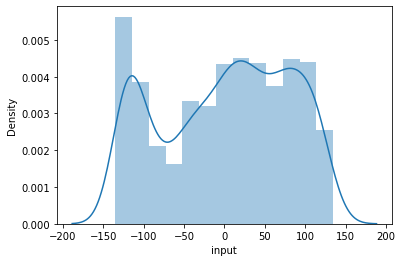

In [8]:
sns.distplot(df.input)

<AxesSubplot:xlabel='output', ylabel='Density'>

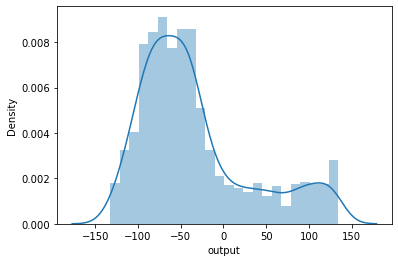

In [9]:
sns.distplot(df.output)

<AxesSubplot:>

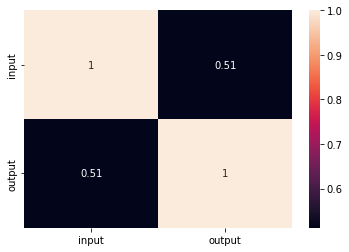

In [10]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='input', ylabel='output'>

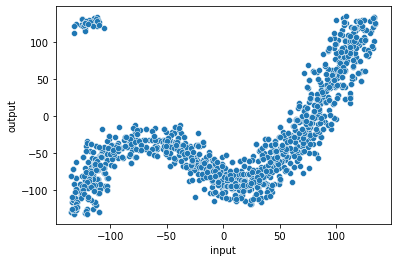

In [11]:
sns.scatterplot(x="input",y="output",data=df)

<AxesSubplot:xlabel='input'>

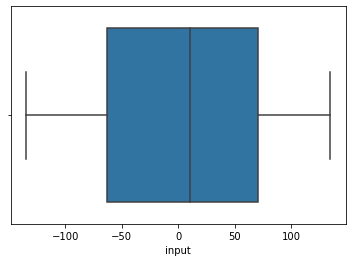

In [12]:
sns.boxplot(df.input)

### Finding outliers

In [13]:
def f1(x):
    ll=df[x].mean()-3*df[x].std()
    ul=df[x].mean()+3*df[x].std()
    return ll,ul

In [14]:
df[(df["input"]<f1("input")[0]) | (df["input"]>f1("input")[1])]

Empty DataFrame
Columns: [input, output]
Index: []

#### There are no outliers

In [15]:
ndf=df.drop(["output"],axis=1)
label=df[["output"]]
ndf.head()

input
0 -122.740667
1 -121.531419
2 -134.917019
3 -120.605951
4 -129.894781

## KNN Model

In [16]:
x_train,x_test,y_train,y_test=train_test_split(ndf,label,train_size=0.7)

In [17]:
x_train

input
1534   98.209223
1112 -121.531419
1045  117.067503
97    -82.774286
899     7.225553
...          ...
1486   58.386909
658   -25.374926
987    36.131246
1155 -113.257481
1490   45.649625

[1187 rows x 1 columns]

In [18]:
knn=KNeighborsRegressor(n_neighbors=3)

In [19]:
model=knn.fit(x_train,y_train)

In [20]:
predicted1=model.predict(x_test)
predicted1

array([[ -44.99938707],
       [ -39.14264798],
       [ -47.64348625],
       [ -75.61480093],
       [ -72.33333333],
       [  -7.89946559],
       [ 123.1447635 ],
       [  27.55245188],
       [-100.11323867],
       [ -92.20621047],
       [ -90.97930743],
       [ -34.31722345],
       [ -75.2931146 ],
       [ -88.69018789],
       [ -34.46959091],
       [   7.        ],
       [  65.50583039],
       [  87.88985076],
       [ -62.87889046],
       [ -91.80422978],
       [ -50.48541275],
       [ -85.33133553],
       [ -90.97930743],
       [ -79.74763235],
       [ -84.33333333],
       [ -45.83654234],
       [ -62.277028  ],
       [ -43.46388541],
       [-109.48287767],
       [ -33.66666667],
       [ -72.81550016],
       [ -89.13995182],
       [ -35.30347423],
       [ -87.75155793],
       [ -66.37530064],
       [ -39.63844391],
       [-108.57339134],
       [ -14.44092763],
       [ -61.45013884],
       [  97.        ],
       [ -40.64489418],
       [  -9.178

In [21]:
sklearn.metrics.mean_squared_error(y_test,predicted1)

1421.3423090649121

In [22]:
sklearn.metrics.r2_score(y_test,predicted1)

0.6734913340202358

## Linear Regression

In [23]:
lr=LinearRegression()

In [24]:
model=lr.fit(x_train,y_train)

In [25]:
predict=model.predict(x_test)
predict

array([[-5.49528701e+01],
       [-6.58192557e+01],
       [-7.68293082e+00],
       [-8.57469183e+01],
       [-4.14785521e+01],
       [-9.19127842e+00],
       [ 1.85038962e+01],
       [-1.24516964e+00],
       [-3.06149796e+01],
       [-8.25862999e+01],
       [-3.04492386e+01],
       [-9.22087045e+01],
       [-3.40303291e+01],
       [-3.45651556e+01],
       [-6.46409078e+01],
       [ 2.99742604e-01],
       [ 8.23007821e+00],
       [ 1.47173561e+01],
       [-1.88776599e+01],
       [-2.66513904e+01],
       [-4.93023497e+01],
       [-8.02999394e+01],
       [-3.04492386e+01],
       [-1.88509604e+01],
       [-8.66827160e+01],
       [-6.10380461e+01],
       [-1.29212918e+01],
       [-7.51581667e+01],
       [-3.00773472e+01],
       [-4.96749660e+00],
       [-8.05779849e+01],
       [-8.67511497e+01],
       [-7.87710574e+01],
       [-8.57917814e+01],
       [-3.51933230e+01],
       [-4.99348624e+01],
       [-9.26651511e+01],
       [-1.65549382e+00],
       [-4.6

In [26]:
mean_squared_error(y_test,predict)

3261.4507781846455

In [27]:
mean_absolute_error(y_test,predict)

42.75354810344681

In [29]:
r2_score(y_test,predict)

0.2507843213051787